<a href="https://colab.research.google.com/github/mmsuttor94/Python-Graduate-School-Analysis/blob/main/Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

This dataset describes a prospective graduate student's chances of admission based on GRE Score, TOEFL Score, University Rating, Statement of Purpose (SOP), Letter of Recommendation (LOR), Current GPA (CGPA), & whether a candidate has research experience. This analysis should offer students further insight into effective preparation for graduate school.

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

Graduate Admission Dataset Link:

https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

In [ ]:
school_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Graduate School.csv')

## Introduction Summary:
1. Mounted Google Drive
2. Imported necessary libraries
3. Included link to data

# **Data Cleaning**

In [ ]:
school_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
school_df.drop(school_df.columns[[0, 7]], axis=1).head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


In [ ]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
print (school_df.size)

3600


## Data Cleaning Summary:

1. .head() - provided a short summary of the data
2. .drop - allowed me to drop irrelevant columns in the dataset, providing a clean overview
3. .info() - provided column names, count of non-null values and data types
4. .size - also confirms there are no null values in the data set
 

# **Histograms**

The following histograms confirm a normal distribution in relevant dataset factors.

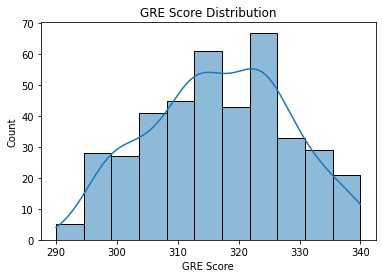

In [ ]:
ax=sns.histplot(school_df['GRE Score'], kde=True).set(title='GRE Score Distribution')

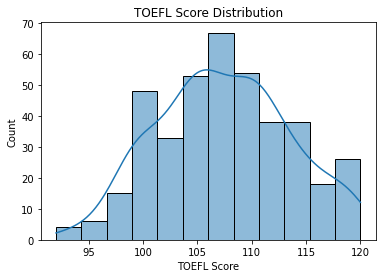

In [ ]:
ax=sns.histplot(school_df['TOEFL Score'], kde=True).set(title='TOEFL Score Distribution')

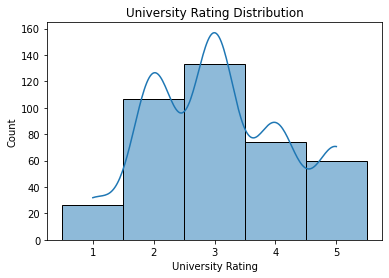

In [ ]:
ax=sns.histplot(school_df['University Rating'], discrete=True, kde=True).set(title='University Rating Distribution')

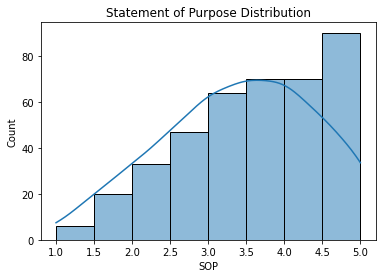

In [ ]:
ax=sns.histplot(school_df['SOP'], bins=8, kde=True).set(title='Statement of Purpose Distribution')

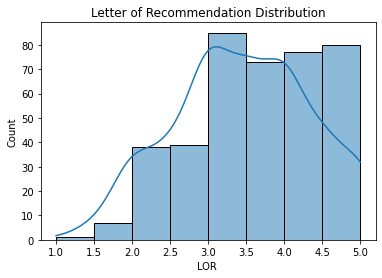

In [ ]:
ax=sns.histplot(school_df['LOR '], bins=8, kde=True).set(title='Letter of Recommendation Distribution')

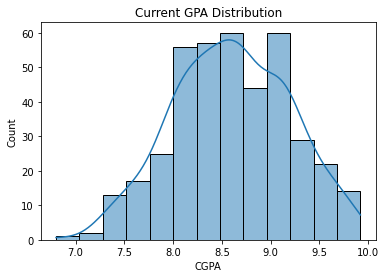

In [ ]:
ax=sns.histplot(school_df['CGPA'], kde=True).set(title = 'Current GPA Distribution')

## Histogram Summary
1. All variables are normally distributed and can be used effectively in statistical analysis
2. sns.histplot: generates a histogram
3. kde = True: determines whether there is a bell curve line on the graph showing the distribution of values in the data set
4. bins = int: sets a predetermined number of bins on the x-axis
5. .set: adds a title to the graph

# **Hypothesis Testing & Analysis**

**P value interpretation:**

A p value of <0.05 causes us to reject the null hypothesis, and a p value >0.05 causes us to accept the null hypothesis.

**R value interpretation:**

+1 - perfect positive association

+0.8 - 1 : very strong positive association

+0.6 - 0.8 : strong positive association

+0.4 - 0.6 : moderate positive association

+0.2 to 0.4 : weak positive association

0 - 0.2 : very weak positive or no association

*measures the linear relationship between two data points

*positive and negative correlations mean the same thing except they are inverse


**Equations**

1. .pearsonr() - returns a r and p value that determines correlation
2. .round() - rounds a value to the specified number of digits
3. .sort() - sorts a list of numbers from lowest to highest
4. sns.regplot() - plots data and a best fit

### **Hypothesis 1**:

The following pearsonr tests will determine which factors most significantly contribute to GRE & TOEFL Scores.

$H_0$ = There will be no dataset factors that strongly contribute to GRE & TOEFL scores. 

$H_a$= At least one dataset factor will be a statistically significant predictor of GRE & TOEFL scores.

### GRE Score Analysis

In [ ]:
r1, p1 = stats.pearsonr(school_df['GRE Score'], school_df['University Rating'])
r1 = round(r1,3)
print(r1,p1)

0.669 3.123350546126204e-53


In [ ]:
r2, p2 = stats.pearsonr(school_df['GRE Score'], school_df['SOP'])
r2 = round(r2,3)
print(r2,p2)

0.613 1.3032879505842152e-42


In [ ]:
r3, p3 = stats.pearsonr(school_df['GRE Score'], school_df['LOR '])
r3 = round(r3,3)
print(r3,p3)

0.558 4.735482888094085e-34


In [ ]:
r4, p4 = stats.pearsonr(school_df['GRE Score'], school_df['CGPA'])
r4 = round(r4,3)
print(r4,p4)

0.833 2.1980596629508104e-104


In [ ]:
r5, p5 = stats.pearsonr(school_df['GRE Score'], school_df['Research'])
r5 = round(r5,3)
print(r5,p5)

0.58 2.1687406026995737e-37


### Sorted r & p values

In [ ]:
rscores1 = [r1, r2, r3, r4, r5]
rscores1.sort()
print(rscores1)

[0.558, 0.58, 0.613, 0.669, 0.833]


In [ ]:
pscores1 = [p1, p2, p3, p4, p5]
pscores1.sort()
print(pscores1)

[2.1980596629508104e-104, 3.123350546126204e-53, 1.3032879505842152e-42, 2.1687406026995737e-37, 4.735482888094085e-34]


### GRE Score Interpretation
- All variables that were compared to GRE Score have a p value < 0.05 which tells us that we can reject the null hypothesis. 

- Based on the pearsonr tests, the two strongest predictors of GRE Score are CGPA & University Rating. We can see this from the r and p value results. 

- The r values (0.833, 0.669) and p values (2.198E-104, 3.123E-53) obtained from comparing GRE Score with CGPA & University Rating respectively, show a strong positive corrleation that is statistically significant.

### GRE Score Data Visualization

Compares GRE scores with the two most strongly correlated dataset factors.

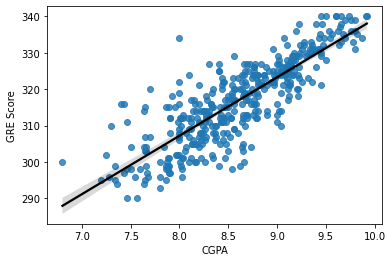

In [ ]:
sns.regplot(x='CGPA', y='GRE Score', data=school_df, line_kws={'color': 'black'})

GRE Score increases as CGPA increases.

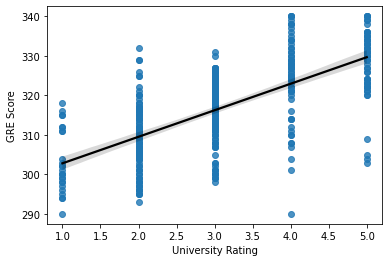

In [ ]:
sns.regplot(x='University Rating', y='GRE Score', data=school_df, line_kws={'color': 'black'})

GRE Score increases as University rating increases.

### TOEFL (Test Of English as a Foreign Language) Score Analysis


In [ ]:
r1, p1 = stats.pearsonr(school_df['TOEFL Score'], school_df['University Rating'])
r1 = round(r1, 3)
print(r1,p1)

0.696 3.994227770767004e-59


In [ ]:
r2, p2 = stats.pearsonr(school_df['TOEFL Score'], school_df['LOR '])
r2 = round(r2, 3)
print(r2,p2)

0.568 1.6630228307348371e-35


In [ ]:
r3, p3 = stats.pearsonr(school_df['TOEFL Score'], school_df['SOP'])
r3 = round(r3, 3)
print(r3,p3)

0.658 5.682291093565217e-51


In [ ]:
r4, p4 = stats.pearsonr(school_df['TOEFL Score'], school_df['CGPA'])
r4 = round(r4, 3)
print(r4,p4)

0.828 3.1343104338459586e-102


In [ ]:
r5, p5 = stats.pearsonr(school_df['TOEFL Score'], school_df['Research'])
r5 = round(r5, 3)
print(r5,p5)

0.49 1.5655039444110798e-25


### Sorted r & p values

In [ ]:
rscores2 = [r1, r2, r3, r4, r5]
rscores2.sort()
print(rscores2)

[0.49, 0.568, 0.658, 0.696, 0.828]


In [ ]:
pscores2 = [p1, p2, p3, p4, p5]
pscores2.sort()
print(pscores2)

[3.1343104338459586e-102, 3.994227770767004e-59, 5.682291093565217e-51, 1.6630228307348371e-35, 1.5655039444110798e-25]


### TOEFL Score Interpretation
- All variables that were compared to TOEFL Score have a p value < 0.05 which tells us that we can reject the null hypothesis.

- Based on the pearsonr tests, the two strongest predictors of TOEFL Score are CGPA & University Rating. This is shown through the r and p value results. 

- The r values (0.828, 0.696) and p values (3.134E-102, 3.994E-59) obtained from comparing TOEFL Score with CGPA & University Rating show a strong positive corrleation that is statistically significant.

### TOEFL Score Data Visualization

Compares TOEFL scores with the two most strongly correlated dataset factors.

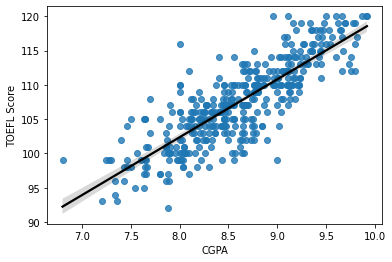

In [ ]:
sns.regplot(x='CGPA', y='TOEFL Score', data=school_df, line_kws={'color': 'black'})

TOEFL Score increases as CGPA increases.

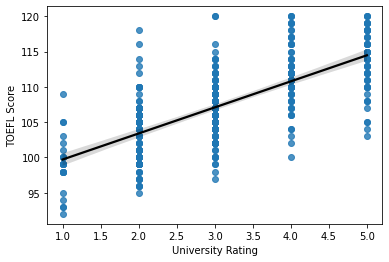

In [ ]:
sns.regplot(x='University Rating', y='TOEFL Score', data=school_df, line_kws={'color': 'black'})

TOEFL Score increases as University Rating increases.

### **Hypothesis 2:**

The following pearsonr tests will determine which factors most significantly affect a student's chance for admission. 

$H_0$ = None of the factors present will significantly contribute to a student’s chance for admission.

$H_1$ = At least one of the dataset factors will have a statistically significant affect on a student's chance of admission

### Chance of Admit Analysis

In [ ]:
r3, p3 = stats.pearsonr(school_df['Chance of Admit '], school_df['University Rating'])
r3 = round(r3, 3)
print(r3,p3)

0.711 6.635019480888702e-63


In [ ]:
r1, p1 = stats.pearsonr(school_df['Chance of Admit '], school_df['GRE Score'])
r1 = round(r1, 3)
print(r1,p1)

0.803 2.4581124141787826e-91


In [ ]:
r2, p2 = stats.pearsonr(school_df['Chance of Admit '], school_df['TOEFL Score'])
r2 = round(r2, 3)
print(r2,p2)

0.792 3.6341021759970536e-87


In [ ]:
r4, p4 = stats.pearsonr(school_df['Chance of Admit '], school_df['SOP'])
r4 = round(r4, 3)
print(r4,p4)

0.676 1.1410946671023095e-54


In [ ]:
r5, p5 = stats.pearsonr(school_df['Chance of Admit '], school_df['LOR '])
r5 = round(r5, 3)
print(r5,p5)

0.67 2.0073145197523104e-53


In [ ]:
r6, p6 = stats.pearsonr(school_df['Chance of Admit '], school_df['CGPA'])
r6 = round(r6, 3)
print(r6,p6)

0.873 2.3365140004973027e-126


In [ ]:
r7, p7 = stats.pearsonr(school_df['Chance of Admit '], school_df['Research'])
r7 = round(r7, 3)
print(r7,p7)

0.553 1.9181733806921424e-33


### Sorted r & p values

In [ ]:
rscores3 = [r1, r2, r3, r4, r5, r6, r7]
rscores3.sort()
print(rscores3)

[0.553, 0.67, 0.676, 0.711, 0.792, 0.803, 0.873]


In [ ]:
pscores3 = [p1, p2, p3, p4, p5, p6, p7]
pscores3.sort()
print(pscores3)

[2.3365140004973027e-126, 2.4581124141787826e-91, 3.6341021759970536e-87, 6.635019480888702e-63, 1.1410946671023095e-54, 2.0073145197523104e-53, 1.9181733806921424e-33]


### Chance of Admit Score Interpretation
- All variables that were compared to Chance of Admit have a p value < 0.05 which tells us that we can reject the null hypothesis.

- Based on the pearsonr tests, the two strongest predictors of Chance of Admit are CGPA & GRE Score. This is shown through the r and p value results. 

- The r values (0.873,0.803) and p values (2.337E-126, 2.458E-91) obtained from comparing Chance of Admit with CGPA & GRE Score show a strong positive corrleation.

### Chance of Admit Data Visualization

Compares Chance of Admit scores with the two most strongly correlated dataset factors.

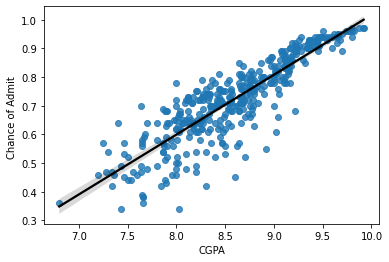

In [ ]:
sns.regplot(x='CGPA', y='Chance of Admit ', data=school_df, line_kws={'color': 'black'})

Chance of Admit increases as CGPA increases.

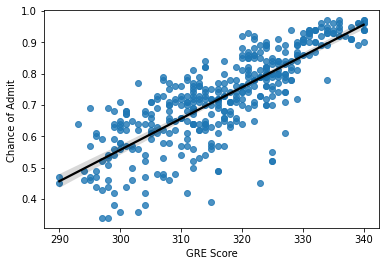

In [ ]:
sns.regplot(x='GRE Score', y='Chance of Admit ', data=school_df, line_kws={'color': 'black'})

Chance of Admit increases as GRE Score increases.

# **Recomendations**

### Hypothesis 1:

In my first hypothesis, I was looking for factors that significantly affected GRE & TOEFL Scores. After doing a pearsonr test, it was clear that the strongest predictors for GRE Scores were CGPA and University Rating. The strongest predictors for TOEFL Scores were also CGPA & University Rating.

This gives some potentially interesting information to students who are taking the GRE & TOEFL examinations. First, CGPA is the best predictor of testing scores. This means that students need to consistently do well throughout their college careers in order to perform well on these examinations. These exams are not the type of test that you can cram for. It requires broad knowledge that is learned through the years.

Second, University Rating is also significantly correlated with GRE & TOEFL Scores. This means that where you go to college for your undergraduate degree may influence your eligibility for graduate school. This information is especially relevant for highschool students that are going to college for the first time. If a student has aspirations to go to graduate school, it may be best to go to a university with a higher rating.

### Hypothesis 2:

In my second hypothesis, I was looking for factors that significantly affected a prospective student's chance of admission. After performing a pearsonr test that compared Chance of Admit to the other dataset variables, it was clear that the strongest predictors for Chance of Admit were CGPA and GRE Score. 

This provides several interesting pieces of information for students. First, Chance of Admit is most strongly correlated with CGPA. This indicates that performing well in undergraduate studies is the most significant factor that predicts admission chances for graduate school. Students who are intending to go to graduate school must focus diligently on their undergraduate studies. 

GRE Scores are the second most significant factor used to predict Chance of Admit for potential graduate students. This is interesting because for students that must take both the GRE & TOEFL examinations, they may want to focus more strongly on the knowledge required in the GRE examination. This can help to delegate study time more appropriately.

# **CONCLUSION**






The information in this notebook analyzes the significance of several variables involved in choosing graduate school candidates. Throughout this project, I used the following process to get my results: 
  1. Cleaned the data. 
  2. Created histograms to confirm normal distributions of each variable. 
  3. Created and tested hypotheses using statistical analysis that compared the data and determined r & p values .
  4. Interpreted the data.
  5. Created data visualizations.
  6. Created recommendations.

Deteriming the most statistically significant predictors of graduate school admission will give students a chance to adjust where they focus their energy to minimize unnecessary work in an already stressful time.
